In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random


import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


In [1]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [28]:
# Load the Fashion-MNIST dataset
train_dataset, test_dataset = tfds.load('fashion_mnist', split=['train', 'test'], shuffle_files=True)

train_data = tfds.as_dataframe(train_dataset)
test_data = tfds.as_dataframe(test_dataset)
print("Fashion MNIST train has rows:",train_data.shape[0]," and columns:", train_data.shape[1])
print("Fashion MNIST test has rows:",test_data.shape[0]," and columns:", test_data.shape[1])
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

test_data.head(3)

Fashion MNIST train has rows: 60000  and columns: 2
Fashion MNIST test has rows: 10000  and columns: 2


,image,label
0,"[[[0], [0], [0], [0], [0], [0], [0], [0], [3],...",4
1,"[[[0], [0], [0], [0], [0], [0], [0], [0], [1],...",4
2,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",9


In [ ]:
# Preprocess the data
train_data['image'] = train_data['image'] / 255.0
test_data['image'] = test_data['image'] / 255.0

# Convert the image data from numpy arrays to tensors
X_train = tf.convert_to_tensor(train_data['image'].tolist())
X_test = tf.convert_to_tensor(test_data['image'].tolist())
y_train = tf.convert_to_tensor(train_data['label'])
y_test = tf.convert_to_tensor(test_data['label'])


In [31]:
from tensorflow.keras import layers, models


# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn1=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 1.2695 - accuracy: 0.5303 - val_loss: 0.7956 - val_accuracy: 0.7036
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7613 - accuracy: 0.7132 - val_loss: 0.7153 - val_accuracy: 0.7218
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7019 - accuracy: 0.7307 - val_loss: 0.6736 - val_accuracy: 0.7434
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6727 - accuracy: 0.7429 - val_loss: 0.6538 - val_accuracy: 0.7456
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6454 - accuracy: 0.7554 - val_loss: 0.6179 - val_accuracy: 0.7663
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6190 - accuracy: 0.7683 - val_loss: 0.5824 - val_accuracy: 0.7810
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5881 - accuracy: 0.7784 - val_loss: 0.5641 - val_accuracy:

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

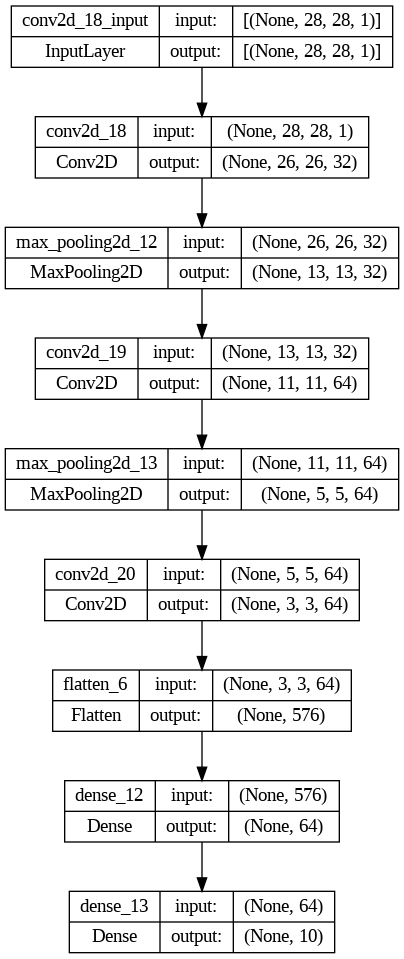

In [33]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as a plot
plot_model(model, to_file='cnn_model1.png', show_shapes=True)


In [34]:
def plot_accuracy_and_loss(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig("accuracy.png")
    plt.show()

    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig("loss.png")
    plt.show()

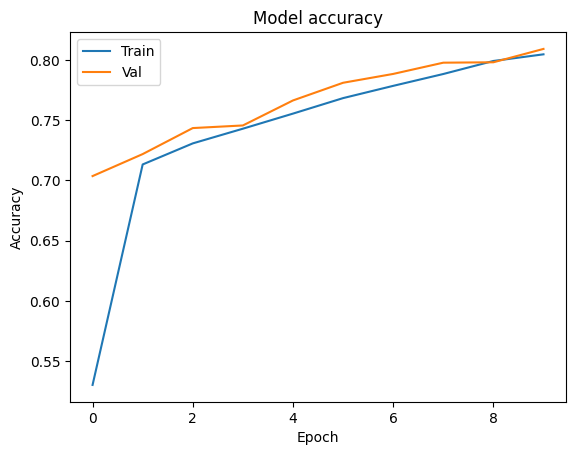

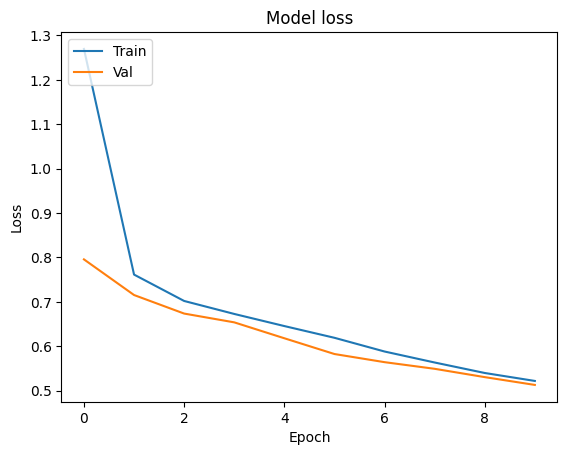

In [35]:
plot_accuracy_and_loss(cnn1)

In [ ]:
#still not hit a platu we can increase the epoch


In [36]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# get the predictions for the test data
predicted_probabilities = model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=1)

# get the indices to be plotted
y_true = test_data.iloc[:, 1].to_numpy()



313/313 [==============================] - 1s 3ms/step - loss: 0.5414 - accuracy: 0.8007
Test loss: 0.5413702726364136
Test accuracy: 0.8007000088691711
313/313 [==============================] - 1s 3ms/step


In [23]:
y_test

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([4, 4, 9, ..., 6, 4, 1])>

313/313 [==============================] - 1s 2ms/step
10000
Correct predicted classes: 8007
Incorrect predicted classes: 1993


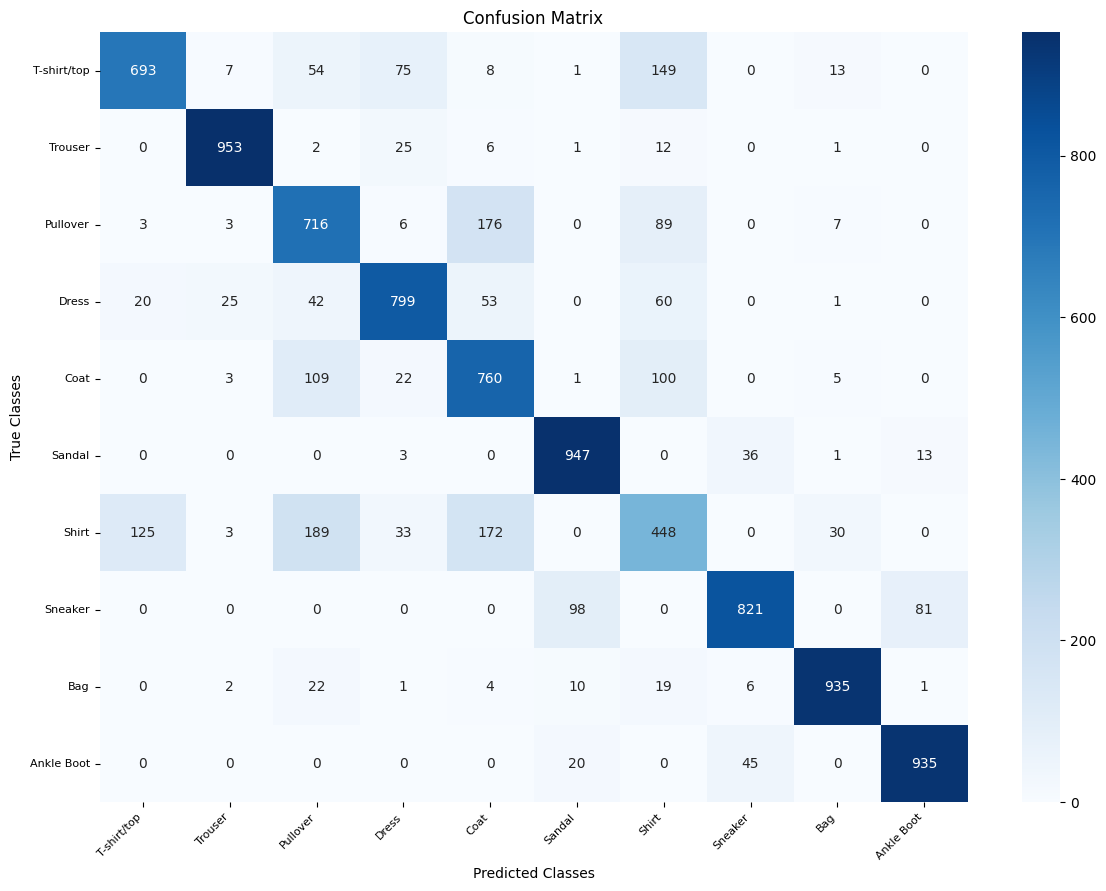

In [38]:
from sklearn.metrics import confusion_matrix

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# get the predictions for the test data
predicted_probabilities = model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=1)

# get the indices to be plotted
#y_true = test_data.iloc[:, 1].to_numpy()
y_true=y_test
predicted_classes = np.array(predicted_classes)
y_true = np.array(y_test)

print(len(predicted_classes))
p = predicted_classes[:10000]
y = y_true[:10000]

correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

cm = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")  # fmt='d' makes digits

# Set x-axis and y-axis labels using class labels
tick_labels = [labels[i] for i in range(len(labels))]
heatmap.set_xticks(np.arange(len(labels)) + 0.5, minor=False)
heatmap.set_yticks(np.arange(len(labels)) + 0.5, minor=False)
heatmap.set_xticklabels(tick_labels, rotation=45, ha="right", fontsize=8)
heatmap.set_yticklabels(tick_labels, rotation=0, ha="right", fontsize=8)

plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')

# Save the plot
#plt.savefig('confusion_matrix.png')

plt.show()

In [41]:
from sklearn.metrics import classification_report
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]

# Generate classification report
report = classification_report(y_true, predicted_classes, target_names=target_names)

# Print the classification report
print(report)


                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.82      0.69      0.75      1000
    Class 1 (Trouser) :       0.96      0.95      0.95      1000
   Class 2 (Pullover) :       0.63      0.72      0.67      1000
      Class 3 (Dress) :       0.83      0.80      0.81      1000
       Class 4 (Coat) :       0.64      0.76      0.70      1000
     Class 5 (Sandal) :       0.88      0.95      0.91      1000
      Class 6 (Shirt) :       0.51      0.45      0.48      1000
    Class 7 (Sneaker) :       0.90      0.82      0.86      1000
        Class 8 (Bag) :       0.94      0.94      0.94      1000
 Class 9 (Ankle Boot) :       0.91      0.94      0.92      1000

               accuracy                           0.80     10000
              macro avg       0.80      0.80      0.80     10000
           weighted avg       0.80      0.80      0.80     10000



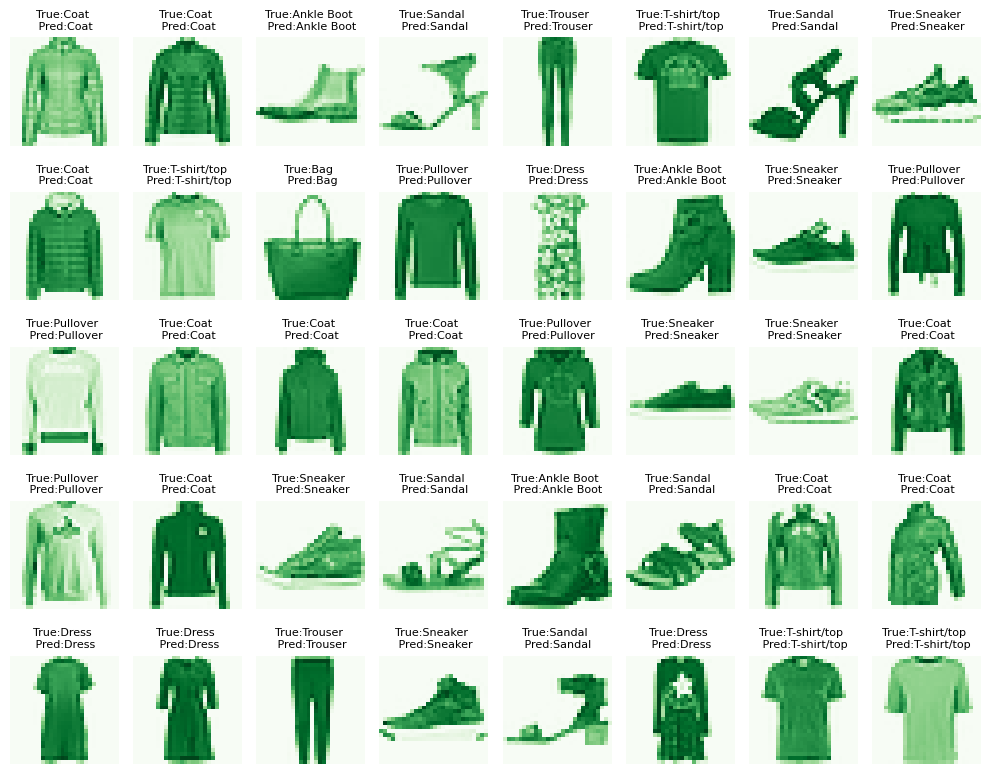

In [47]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    fig, axes = plt.subplots(5, 8, figsize=(10,8))

    for i, ax in enumerate(axes.flat):
        index=data_index[i]
        ax.imshow(X_test[index], cmap=cmap)
        ax.axis('off')
        title="True:{} \n Pred:{}".format(labels[y_true[index]],labels[predicted_classes[index]])
        ax.set_title(title, fontsize=8)
        #ax.set_title("True:{} \n Pred:{}".format(labels[y_true[index]],labels[predicted_classes[index]])) #labels[data_sample_labels[i]])

    plt.tight_layout()
    #plt.savefig('sample_images.png')  # Save the figure
    plt.show()

plot_images(correct, "Greens")

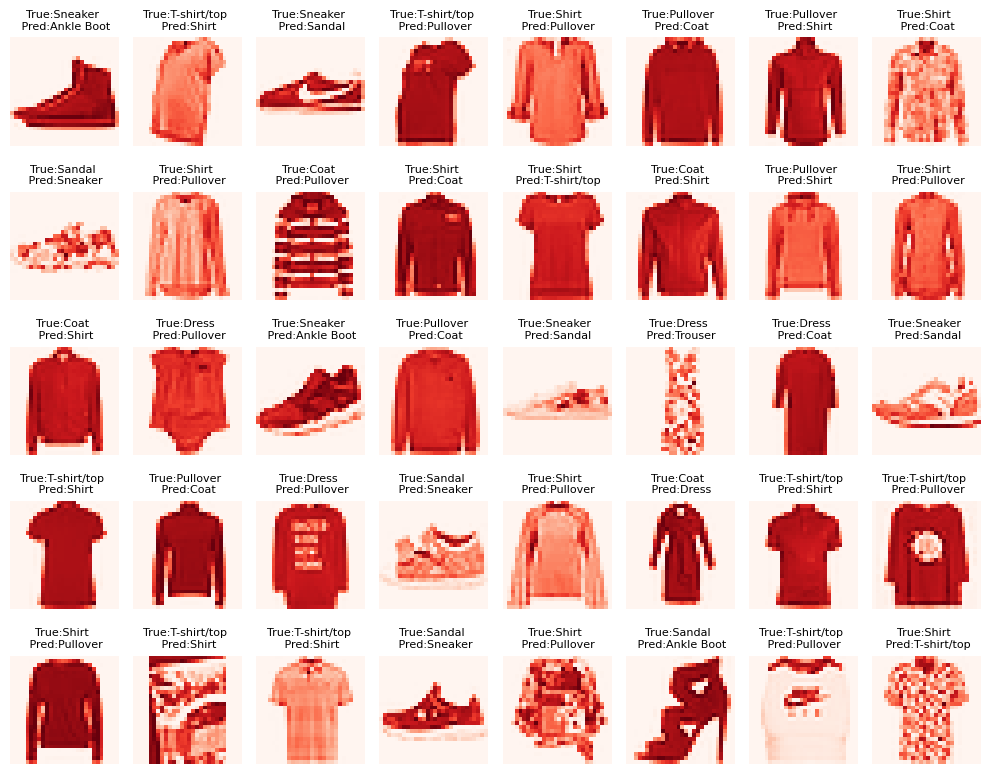

In [48]:
plot_images(incorrect, "Reds")

In [ ]:
# Increase Complexity and number of epochs

In [54]:
# Convert the image data from numpy arrays to tensors
X_train = tf.convert_to_tensor(train_data['image'].tolist())
X_test = tf.convert_to_tensor(test_data['image'].tolist())
y_train = tf.convert_to_tensor(train_data['label'])
y_test = tf.convert_to_tensor(test_data['label'])

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn2=model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
375/375 [==============================] - 5s 6ms/step - loss: 1.1994 - accuracy: 0.5646 - val_loss: 0.7554 - val_accuracy: 0.7197
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.7175 - accuracy: 0.7305 - val_loss: 0.6831 - val_accuracy: 0.7390
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6659 - accuracy: 0.7467 - val_loss: 0.6411 - val_accuracy: 0.7570
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6230 - accuracy: 0.7664 - val_loss: 0.5927 - val_accuracy: 0.7718
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5816 - accuracy: 0.7807 - val_loss: 0.5633 - val_accuracy: 0.7845
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.5490 - accuracy: 0.7952 - val_loss: 0.5289 - val_accuracy: 0.7989
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5213 - accuracy: 0.8052 - val_loss: 0.4881 - val_accuracy: 0.8177
Epoch 

In [55]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_10 (Flatten)        (None, 1152)            

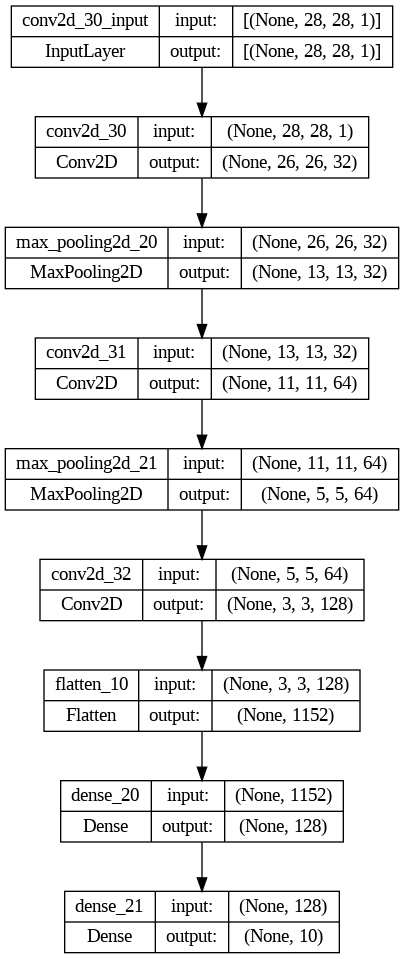

In [57]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as a plot
plot_model(model, to_file='cnn_model2.png', show_shapes=True)


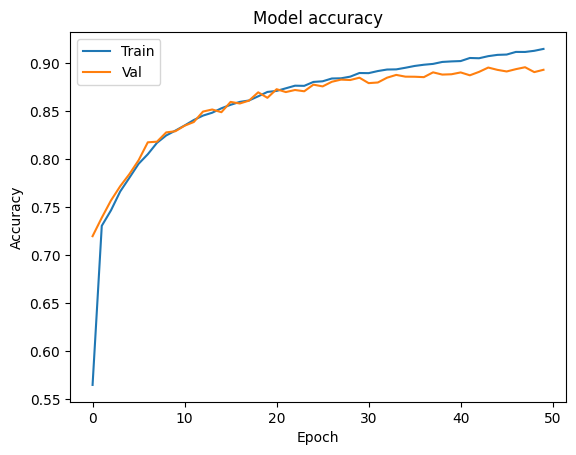

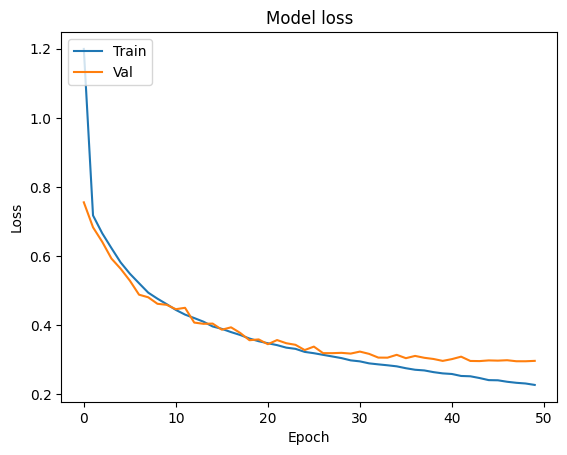

In [59]:
plot_accuracy_and_loss(cnn2)

In [60]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8844
Test loss: 0.332289457321167
Test accuracy: 0.8844000101089478


It looks Like it starts to over fit after cycle 28 ish.


## Ading Dropouts to prevent overfitting

Dropout is a regularization technique that helps prevent overfitting in neural networks. It works by randomly setting a fraction of input units to 0 during training, which helps to prevent the model from relying too much on specific features and encourages it to learn more robust and generalizable representations.

In this specific model, dropout layers with different dropout rates have been added after each pooling layer and after the dense layer. The dropout rates used are 0.25, 0.4, and 0.3. These rates determine the fraction of input units to drop during training. By adding dropout, the model aims to improve its generalization performance and reduce overfitting on the training data, thus improving its performance on the validation set.

In [61]:
# Define the CNN architecture


# Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn3=model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
375/375 [==============================] - 4s 7ms/step - loss: 1.3313 - accuracy: 0.4939 - val_loss: 0.8075 - val_accuracy: 0.6944
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.8582 - accuracy: 0.6725 - val_loss: 0.7179 - val_accuracy: 0.7268
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7960 - accuracy: 0.6968 - val_loss: 0.6858 - val_accuracy: 0.7372
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7535 - accuracy: 0.7129 - val_loss: 0.6466 - val_accuracy: 0.7518
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7282 - accuracy: 0.7240 - val_loss: 0.6333 - val_accuracy: 0.7563
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7037 - accuracy: 0.7323 - val_loss: 0.6065 - val_accuracy: 0.7664
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.6843 - accuracy: 0.7370 - val_loss: 0.5949 - val_accuracy: 0.7730
Epoch 

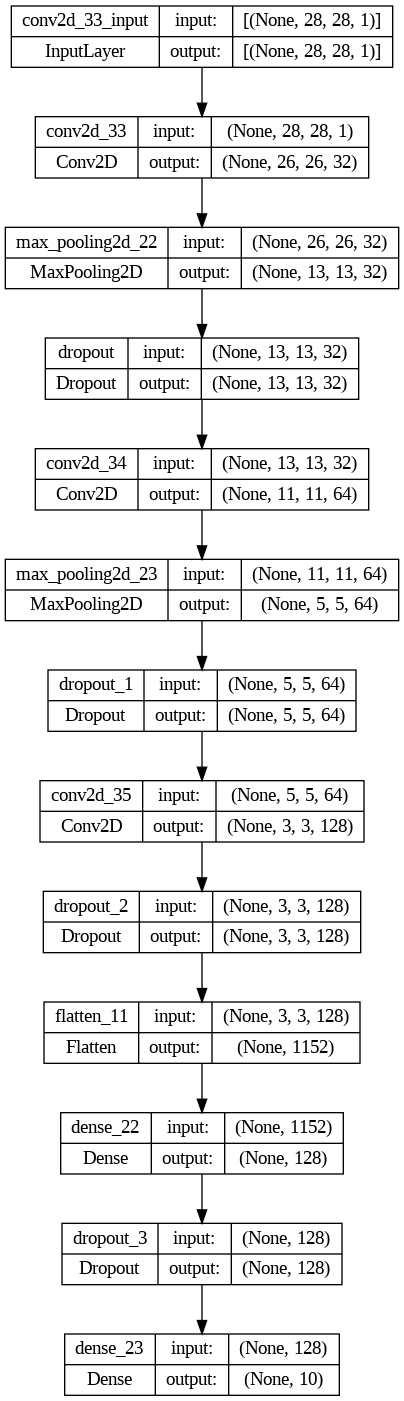

In [62]:
# Save the model architecture as a plot
plot_model(model, to_file='cnn_model3.png', show_shapes=True)


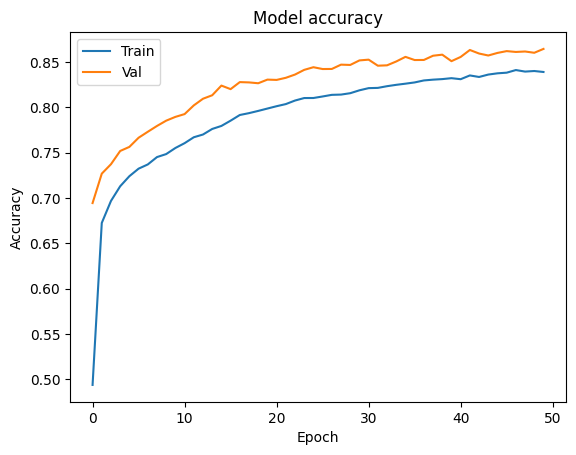

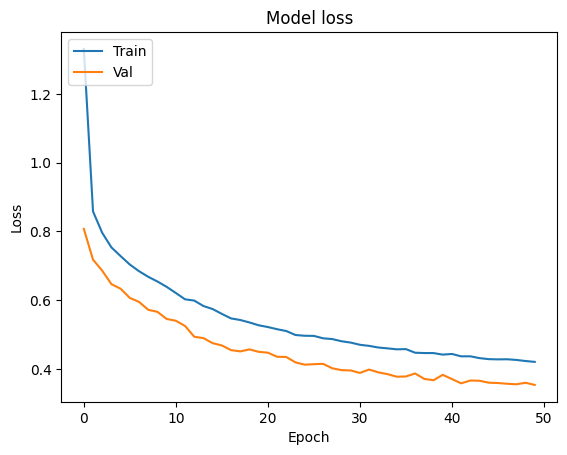

In [64]:
plot_accuracy_and_loss(cnn3)


In [ ]:
### seems we droped too much info here: it flattens with 85% accuracy . and doesn't do as well

In [65]:
# Define the CNN architecture


# Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn4=model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
375/375 [==============================] - 5s 8ms/step - loss: 1.2721 - accuracy: 0.5281 - val_loss: 0.7819 - val_accuracy: 0.7048
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7911 - accuracy: 0.6981 - val_loss: 0.6922 - val_accuracy: 0.7333
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.7242 - accuracy: 0.7232 - val_loss: 0.6336 - val_accuracy: 0.7547
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.6740 - accuracy: 0.7436 - val_loss: 0.5854 - val_accuracy: 0.7717
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.6391 - accuracy: 0.7544 - val_loss: 0.5600 - val_accuracy: 0.7837
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.6075 - accuracy: 0.7664 - val_loss: 0.5294 - val_accuracy: 0.7939
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.5822 - accuracy: 0.7770 - val_loss: 0.5153 - val_accuracy: 0.8033
Epoch 

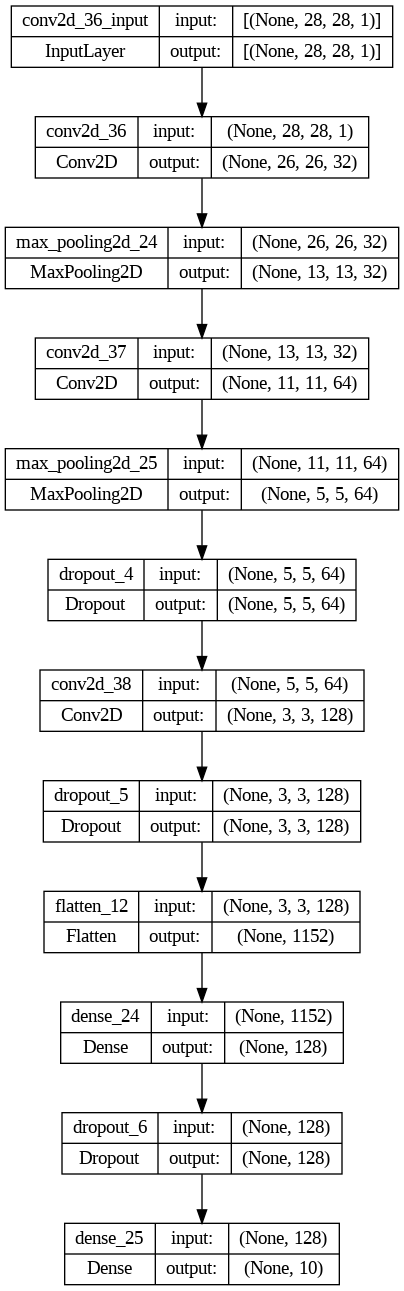

In [68]:
# Save the model architecture as a plot
plot_model(model, to_file='cnn_model4.png', show_shapes=True)


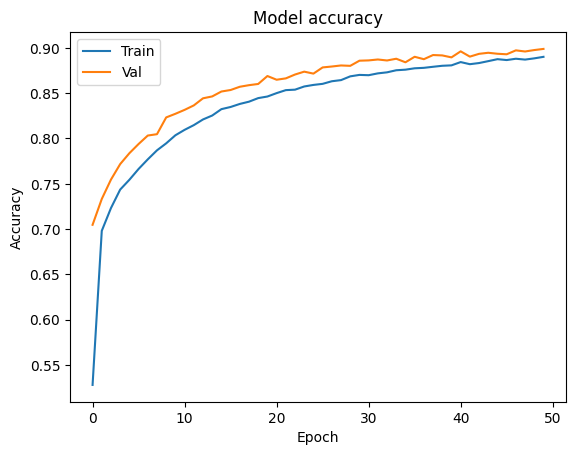

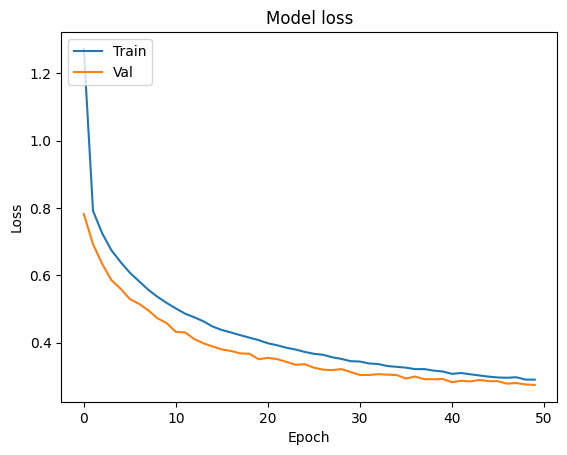

In [66]:
plot_accuracy_and_loss(cnn4)


313/313 [==============================] - 1s 4ms/step - loss: 0.3049 - accuracy: 0.8862
Test loss: 0.3049033582210541
Test accuracy: 0.8862000107765198
313/313 [==============================] - 1s 2ms/step
10000
Correct predicted classes: 8862
Incorrect predicted classes: 1138


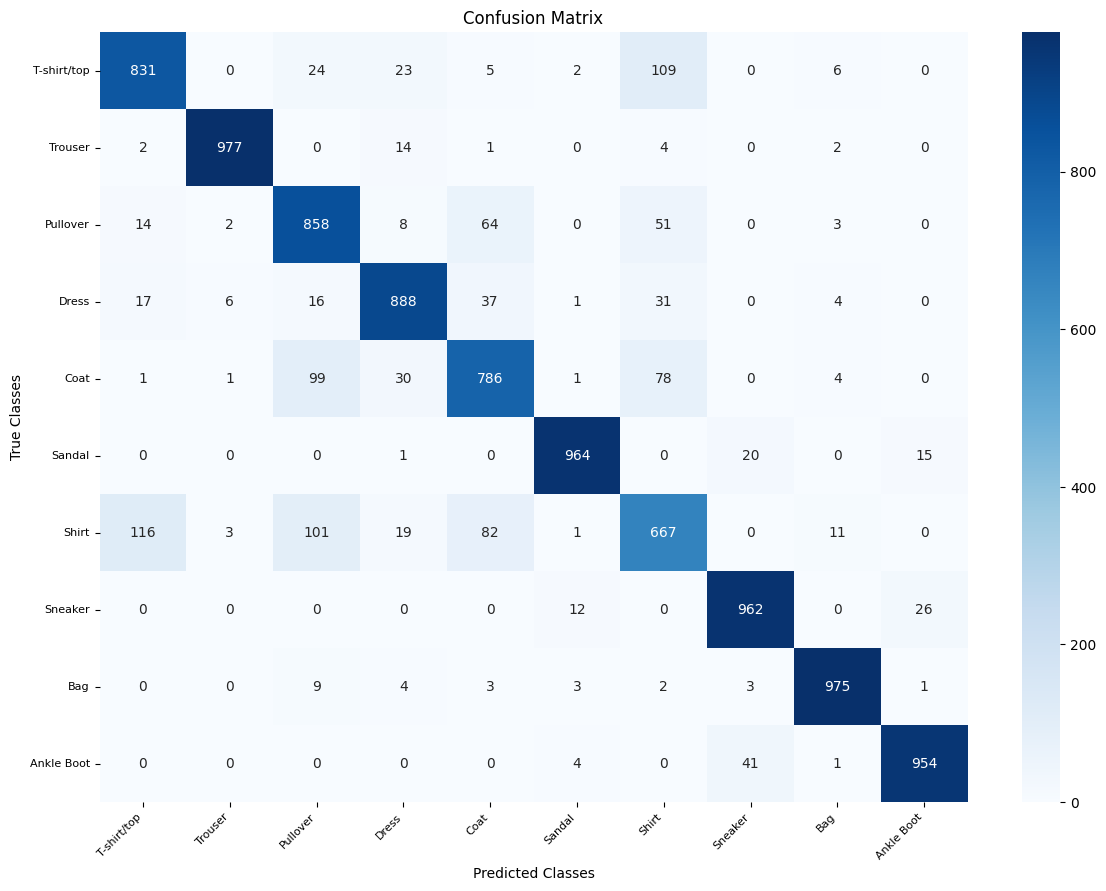

In [69]:
from sklearn.metrics import confusion_matrix

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# get the predictions for the test data
predicted_probabilities = model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=1)

# get the indices to be plotted
#y_true = test_data.iloc[:, 1].to_numpy()
y_true=y_test
predicted_classes = np.array(predicted_classes)
y_true = np.array(y_test)

print(len(predicted_classes))
p = predicted_classes[:10000]
y = y_true[:10000]

correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

cm = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")  # fmt='d' makes digits

# Set x-axis and y-axis labels using class labels
tick_labels = [labels[i] for i in range(len(labels))]
heatmap.set_xticks(np.arange(len(labels)) + 0.5, minor=False)
heatmap.set_yticks(np.arange(len(labels)) + 0.5, minor=False)
heatmap.set_xticklabels(tick_labels, rotation=45, ha="right", fontsize=8)
heatmap.set_yticklabels(tick_labels, rotation=0, ha="right", fontsize=8)

plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')

# Save the plot
#plt.savefig('confusion_matrix.png')

plt.show()

In [70]:
from sklearn.metrics import classification_report
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]

# Generate classification report
report = classification_report(y_true, predicted_classes, target_names=target_names)

# Print the classification report
print(report)


                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.85      0.83      0.84      1000
    Class 1 (Trouser) :       0.99      0.98      0.98      1000
   Class 2 (Pullover) :       0.78      0.86      0.81      1000
      Class 3 (Dress) :       0.90      0.89      0.89      1000
       Class 4 (Coat) :       0.80      0.79      0.79      1000
     Class 5 (Sandal) :       0.98      0.96      0.97      1000
      Class 6 (Shirt) :       0.71      0.67      0.69      1000
    Class 7 (Sneaker) :       0.94      0.96      0.95      1000
        Class 8 (Bag) :       0.97      0.97      0.97      1000
 Class 9 (Ankle Boot) :       0.96      0.95      0.96      1000

               accuracy                           0.89     10000
              macro avg       0.89      0.89      0.89     10000
           weighted avg       0.89      0.89      0.89     10000



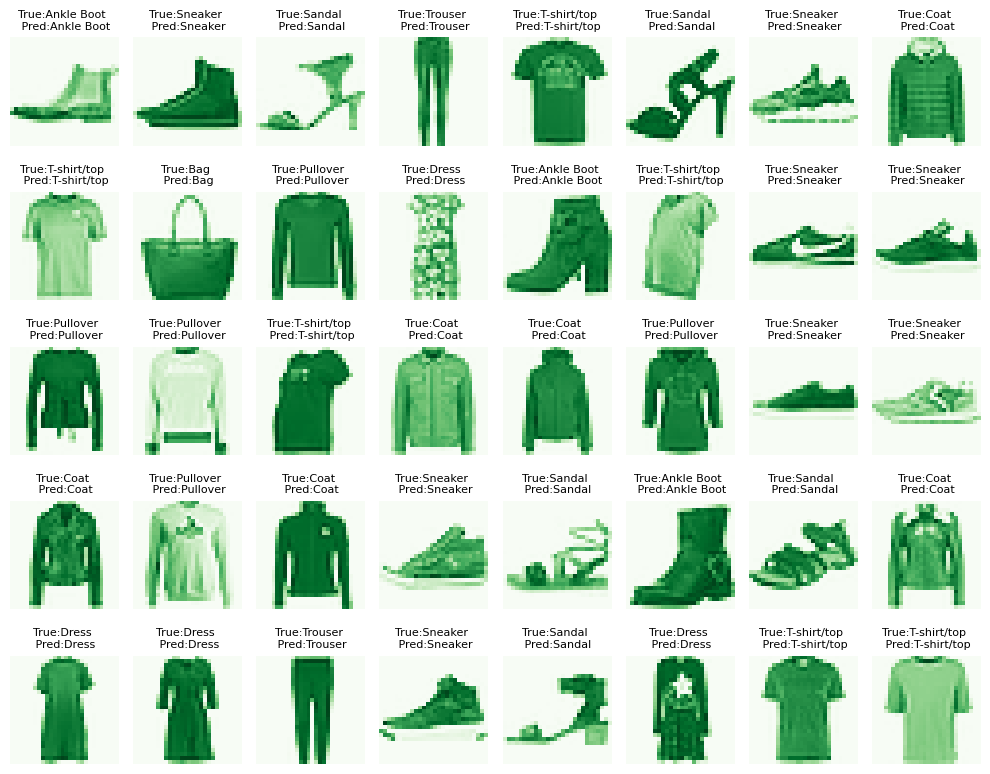

In [71]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    fig, axes = plt.subplots(5, 8, figsize=(10,8))

    for i, ax in enumerate(axes.flat):
        index=data_index[i]
        ax.imshow(X_test[index], cmap=cmap)
        ax.axis('off')
        title="True:{} \n Pred:{}".format(labels[y_true[index]],labels[predicted_classes[index]])
        ax.set_title(title, fontsize=8)
        #ax.set_title("True:{} \n Pred:{}".format(labels[y_true[index]],labels[predicted_classes[index]])) #labels[data_sample_labels[i]])

    plt.tight_layout()
    #plt.savefig('sample_images.png')  # Save the figure
    plt.show()

plot_images(correct, "Greens")

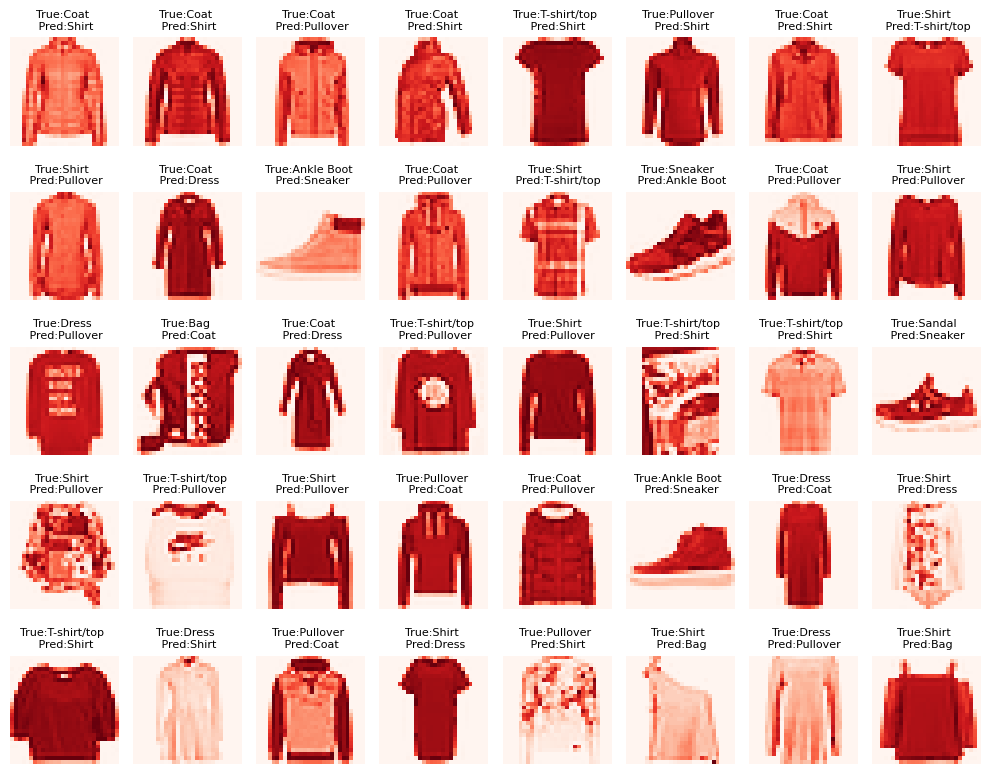

In [72]:
plot_images(incorrect, "Reds")